In [105]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
df=pd.read_csv('Abalone Case Study.csv')
df=pd.DataFrame(df)

In [107]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [108]:
df.keys()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [109]:
df.shape

(4177, 9)

In [110]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Here we have object data in sex column

In [111]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We do not have any null values in the dataset.

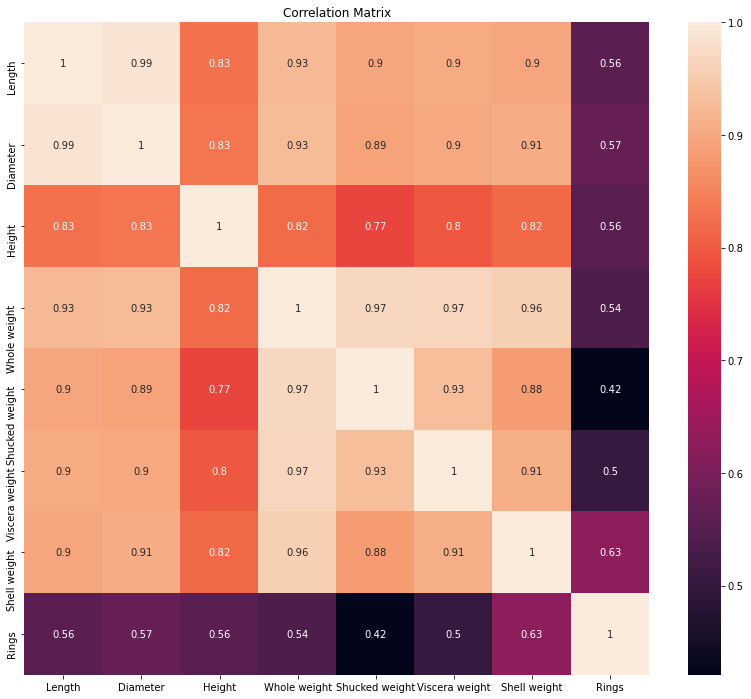

In [112]:
corr_mat=df.corr()
plt.figure(figsize=[14,12])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [113]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Length               AxesSubplot(0.125,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Viscera weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Shell weight            AxesSubplot(0.125,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.257857,0.125;0.110714x0.343182)
dtype: object

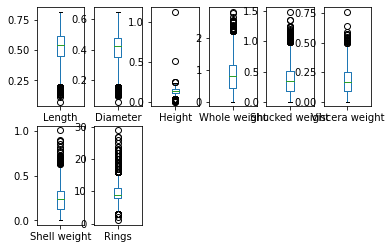

In [114]:
df.plot(kind='box',subplots=True, layout=(2,6))

We can see the outliers in all the parameters we will try to remove the outlier below.


In [115]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])

In [116]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Here M=2, F=0, I=1 after converting the object/string in .
M= Male, F= Female, I= Infants.

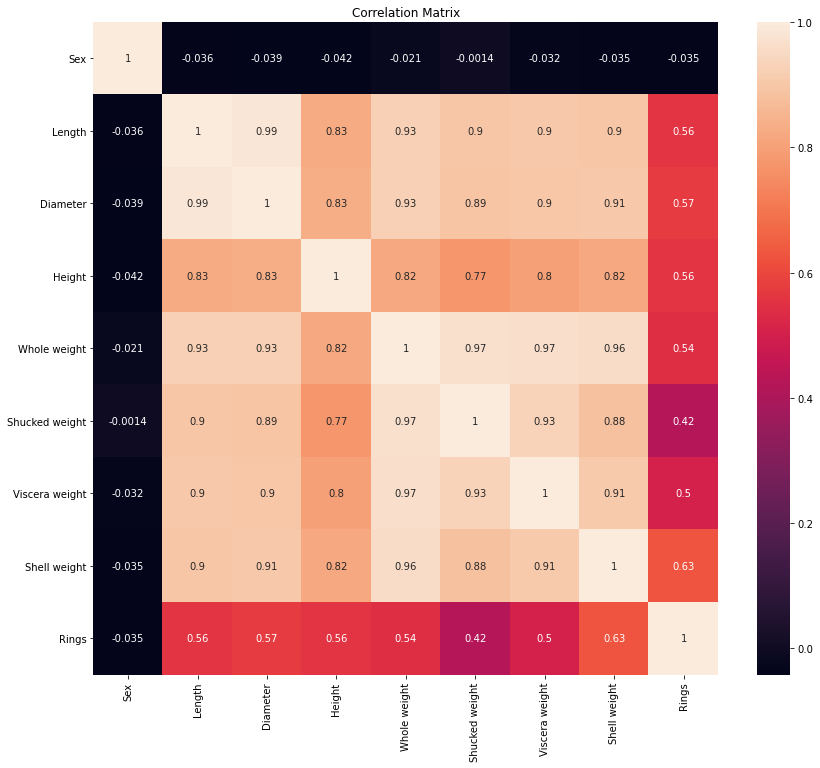

In [117]:
corr_mat=df.corr()
plt.figure(figsize=[14,12])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

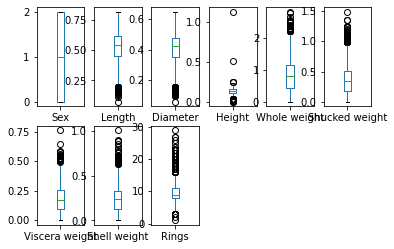

In [118]:
df.plot(kind='box',subplots=True, layout=(2,6))

In [119]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [120]:
df['age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

In [121]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


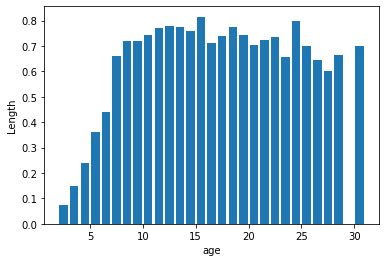

In [122]:
plt.bar(df['age'], df['Length'])
plt.xlabel('age')
plt.ylabel('Length')
plt.show()

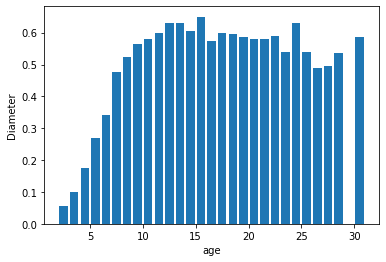

In [123]:
plt.bar(df['age'], df['Diameter'])
plt.xlabel('age')
plt.ylabel('Diameter')
plt.show()

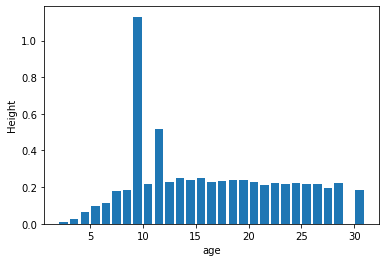

In [124]:
plt.bar(df['age'], df['Height'])
plt.xlabel('age')
plt.ylabel('Height')
plt.show()

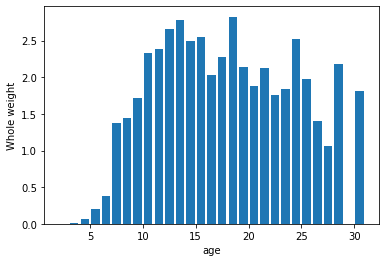

In [125]:
plt.bar(df['age'], df['Whole weight'])
plt.xlabel('age')
plt.ylabel('Whole weight')
plt.show()

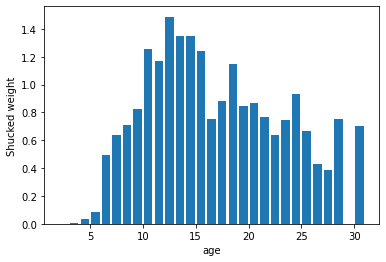

In [126]:
plt.bar(df['age'], df['Shucked weight'])
plt.xlabel('age')
plt.ylabel('Shucked weight')
plt.show()

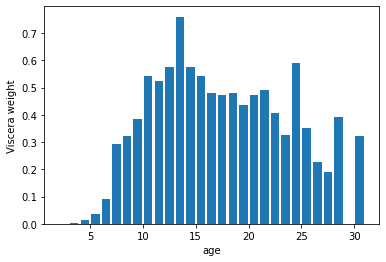

In [127]:
plt.bar(df['age'], df['Viscera weight'])
plt.xlabel('age')
plt.ylabel('Viscera weight')
plt.show()

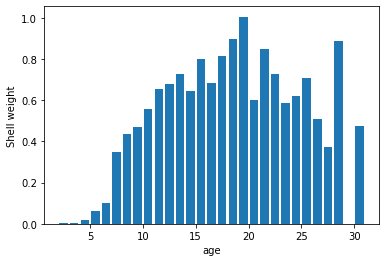

In [128]:
plt.bar(df['age'], df['Shell weight'])
plt.xlabel('age')
plt.ylabel('Shell weight')
plt.show()

Here we have determine the relationship between all the parameters and the target factor age.


In [129]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
1,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
2,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
0,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


<AxesSubplot:>

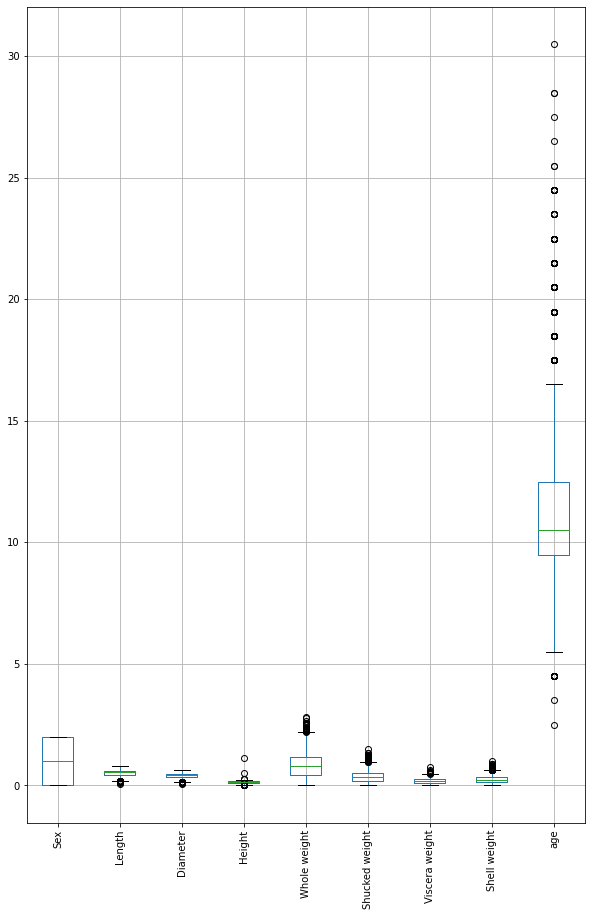

In [130]:
df.boxplot( rot = 90, figsize=(10,15))

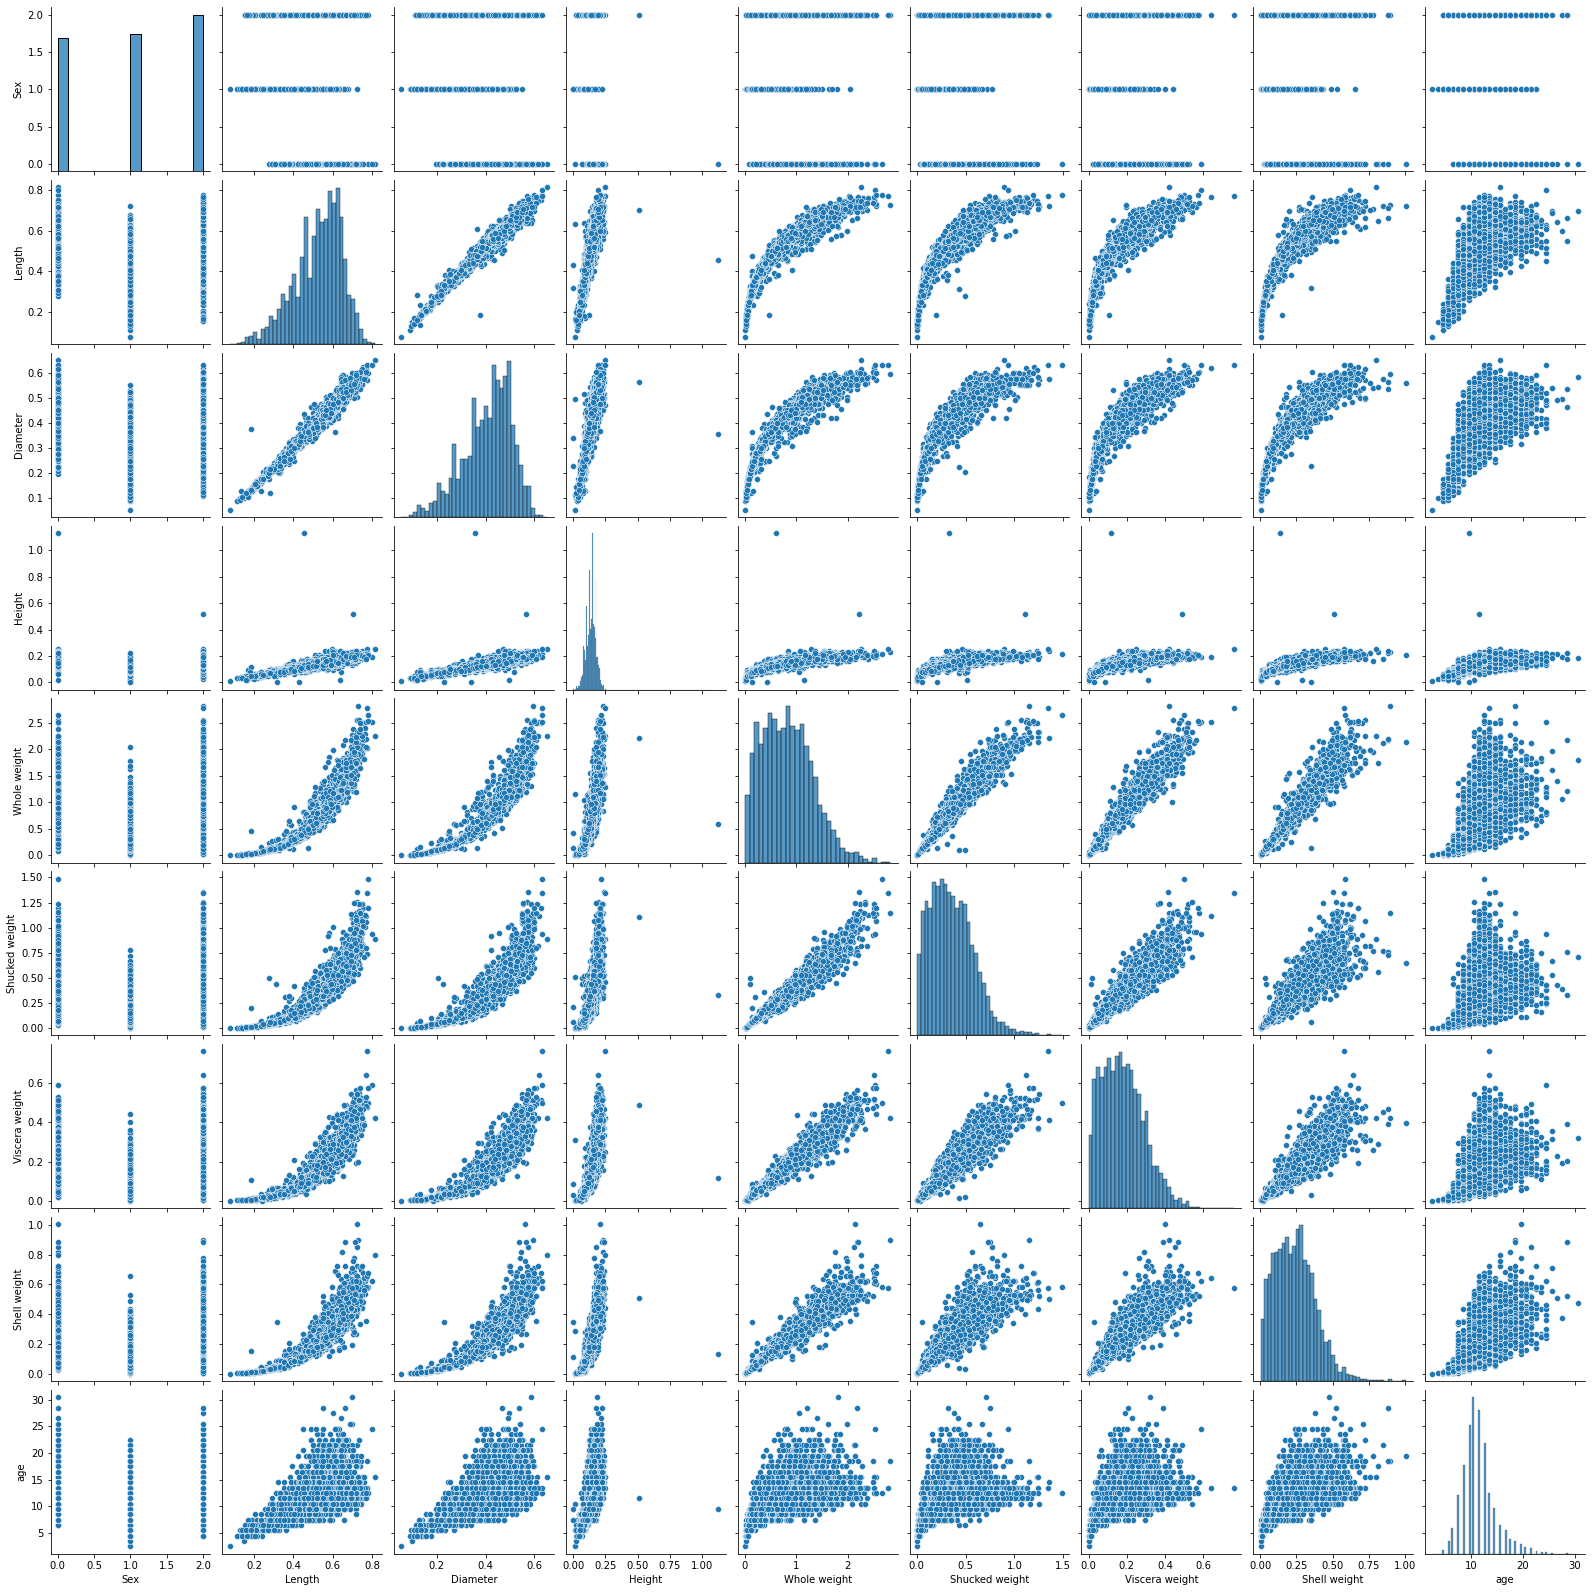

In [131]:
sns.pairplot(df)

We are having positive realtionship within the parameters.

In [132]:
x=df.iloc[:,1:8]
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [133]:
y = df['age']

In [140]:

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
standardScale = StandardScaler()
standardScale.fit_transform(x)

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [142]:
print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(3341, 7) (836, 7)
(3341,) (836,)


In [143]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [144]:
pred=lm.predict(x_test)
print('Prediction',pred)
print('Actual value', y_test)

Prediction [14.39198576 10.88807447 16.18238907 10.4510333  11.58945501 11.28495887
  8.39245679  6.57278965  8.43165696 12.97117632 11.91547638 11.26016697
  9.81803235 15.10695605 12.97481286 13.54588085 11.62153736  8.75425129
 15.09135928 13.82821476 12.82099834  9.12941391  9.4038924   9.79770943
 11.2203726  11.63343609 10.63236479 11.24937889 14.14727651 12.14386547
 12.21193131  9.22984256 11.35901737 10.23038084 14.47658273 11.94219497
 13.76149644 10.4746867   8.85165292  9.06381169 14.7623857   9.85417301
 10.91557196 13.41960426 12.30165539 10.28302085 11.23050809  9.82665338
 10.52600637  9.50481833  9.28693002 12.49835614 12.92753114 10.07278641
 16.98246984  8.57085221 14.9798825  15.42530874 11.82506166 14.78484734
 11.32049656  8.56931765 10.96042508 11.2264305  12.81684088 10.4109948
 12.88922985 10.70315477  9.77725099 12.52990464  9.13752462 10.88663696
 16.03558167  8.96367769 18.56494842 10.49999269 11.20866392 14.02051905
 17.46980628 13.97649323 13.62857144 15.2

In [154]:
print("error:")
print('Mean Squared error is',mean_squared_error(pred,y_test))

error:
Mean Squared error is 4.865760583143411


In [155]:

print('Root Mean Square error is',np.sqrt(mean_squared_error(y_test,pred)))

Root Mean Square error is 2.205846908364996


In [159]:
 from sklearn.metrics import mean_absolute_error
print('Mean Absolute error is ', mean_absolute_error(y_test,pred))

Mean Absolute error is  1.6142212489255554


In [161]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
#ls=Lasso(alpha=1.0) is a default value
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
print('Lasso score is ',ls.score(x_train,y_train))

Lasso acore is  0.5292955946763939


In [164]:
rd=Ridge(alpha=0.0001)                             #try to minimize the coefficeient variance
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
print('Ridge score is ',ls.score(x_train,y_train))

Ridge score is  0.5292955946763939


In [166]:
from sklearn.linear_model import ElasticNet
enr= ElasticNet(alpha=0.0001)
    #enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.5290413829745937


array([  0.1152982 ,  12.27259235,  10.13767392,   8.42405785,
       -19.57420944,  -8.31373268,   9.11362343])

In [174]:
from sklearn.svm import SVR

svr =SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr= SVR(kernel ='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

svr = SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.4789873781398465
0.464684326054296
0.5366649485994068


Hyper parameter tunning using Gridsearch cv

In [184]:
from sklearn.model_selection import GridSearchCV
parameter  = {'alpha':[0.01],
         'solver' : ['auto']}
svr = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
svr.fit(x_train, y_train)
svr.best_params_, svr.best_score_

({'alpha': 1, 'solver': 'lsqr'}, 0.521066407536596)